# Quiz 1: Manipulating Data & Linear  Regressions

In this quiz, you will get hands-on experience preparing a real-world dataset for modeling. Then, you will applying linear regressions to make predictions. We will use a truncated version of the Divvy Bike Share dataset, which was used in the lab and lecture. 

After completing this lab, you should be able to: 

1. Manipulate a dataset in Python/Pandas/Jupyter Notebooks.
2. Implement pre-processing methods on your dataset, including:
    * Truncating and subseting your data.
    * Normalizing your dataset in preparation for training and testing.
3. Apply the `scikit-learn` Linear Regression model to a real-world dataset. You will be able to:
    * Split your data into a training and testing set.
    * Create a model. 
    * Combine data and metrics from multiple models.
4. Evaluate your model using measurements like MAE, MSE and $R^2$.

We will be working with a truncated version of the [Divvy Trip data](https://data.cityofchicago.org/Transportation/Divvy-Trips/fg6s-gzvg), as well as some weather data for Chicago from the National Oceanic and Atmospheric Administration (NOAA).

If you are curious about how we obtained the dataset, you can read about the available data (and make your own requests) [here](https://www.ncdc.noaa.gov/cdo-web/search).You will also find this [documentation](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf) about the dataset useful, particularly the part describing the meanings of various columns.

First, we will load Pandas and these datasets. Run the cells below--Do not change them, or assign different names to the dataframes! (the autograder assumes that you have run this cell as is)

In [259]:
import pandas as pd

ddf = pd.read_csv("./data/Divvy_Trips_2018_truncated.csv") # Load the Divvy trip data
wdf = pd.read_csv("./data/chicago-weather.csv") # Load the Chicago weather data from NOAA

#Set the dates to type Datetime
ddf['START TIME'] = pd.to_datetime(ddf['START TIME'], format='%m/%d/%Y %H:%M:%S %p')
wdf['DATE'] = pd.to_datetime(wdf['DATE'], format='%Y/%m/%d')

## 0. Doing this quiz

Because this quiz assesses your skills around manipulating data in Pandas, it is presented a bit differently than the other graded quizzes in this course. It is conducted entirely in this Jupyter Notebook. You will be asked to fill in code in functions, and then the autograder will test your code. There are two kinds of tests:
- Sanity checks to make sure you're on the right track. You can run those cells to check your work, or click the "Vaildate" button in the toolbar when you're done. They do not count towards your grade. If you get no errors, then you're on the right track.
- Final checks to see if your functions are returning the expected results. These are only run after you submit the assignment, and these are what your grade is based on.

An example (worth zero points) is below:

## Question 0 (Ungraded!)

For the weather data, `TMIN` records minimum temperatures, and `TMAX` records maximum temperatures. You want to know the lowest and the highest temperatures recorded by the weather stations in this dataset.

- Find the lowest minimum temperature
- Find the highest maximum temperature
- Return the lowest temperature and the highest temperature, in that order

In [260]:
def question_0():
    # your code here
    min = wdf["TMIN"].min()
    max = wdf["TMAX"].max()
    return (min, max)
    #Your answer might look like the following--
    
    # high_temp = wdf["TMAX"].max()
    # low_temp = wdf["TMIN"].min()
    # return (low_temp, high_temp)

In [261]:
# Run this cell as a sanity check.
#We check that question_0() returns two values, as requested
# Then, check whether the second is higher than the first--if not, you may have gotten them mixed up
low_temp, high_temp = question_0() # Get the two values from question_0()
assert high_temp>low_temp # Test that the high is greater than the low

# For grading, the autograder will check whether your answer actually has the right values

## 1. Preparing the Datasets

In the first part of the assignment, we will prepare our datasets for modeling.

### Question 1: Preparing the weather data

First, we will prepare the weather data. If you look at this dataset, you will see that it gives two years of readings, and more than one reading for each day--the readings from multiple weather stations are recorded:

In [262]:
wdf.describe() # Run this cell to see a description of the weather data

,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TOBS,WDF2,WDF5,WDMV,WSF2,WSF5
count,2185.000000,1303.000000,1295.00000,1458.000000,77491.000000,45370.000000,20556.000000,730.000000,7020.000000,7028.000000,4847.000000,2188.000000,2187.000000,211.000000,2188.000000,2187.000000
mean,8.991611,4.745971,0.74088,1287.608368,0.143893,0.126284,0.815723,50.401370,58.903704,41.498435,46.585723,185.219378,185.939643,17.302370,19.078748,26.426566
std,3.543335,4.535482,0.99868,599.380253,0.364978,0.601270,2.222117,20.566444,21.807682,19.988210,19.869322,107.819971,105.813504,17.424486,5.611734,8.363227
min,1.340000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-15.000000,-12.000000,-24.000000,-23.000000,10.000000,10.000000,0.000000,6.000000,6.900000
25%,6.490000,2.000000,0.11000,950.000000,0.000000,0.000000,0.000000,34.000000,41.000000,27.000000,31.000000,80.000000,80.000000,6.200000,15.000000,19.900000
50%,8.500000,3.000000,0.44000,1337.000000,0.000000,0.000000,0.000000,48.000000,58.000000,40.000000,46.000000,200.000000,200.000000,13.000000,18.100000,25.100000
75%,11.180000,5.000000,0.98500,1646.750000,0.100000,0.000000,0.000000,70.000000,79.000000,60.000000,65.000000,270.000000,270.000000,24.200000,23.000000,31.100000
max,25.950000,49.000000,9.66000,2359.000000,6.520000,10.500000,24.000000,87.000000,102.000000,82.000000,88.000000,360.000000,360.000000,156.000000,46.100000,67.100000


We will only be interested in (1) the data from 2018 and (2) the daily low and high from the Chicago Midway Airport station (station USC00111577). The high and the low are stored in the columns `TMAX` and `TMIN`.

Write a function that returns a new dataframe. It should have the following properties:
- Only recordings for 2018 (i.e., exclude the readings from 2019)
- Only recordings from the Chicago Midway Airport station (USC00111577)
- Only the high (`TMAX`) and low (`TMIN`)

The first few rows should look as follows:

|       |       DATE |  TMIN | TMAX |
|------:|-----------:|------:|-----:|
| 32098 | 2018-01-01 | -7.0  | 3.0  |
| 32099 | 2018-01-02 | -10.0 | 7.0  |
| 32100 | 2018-01-03 | 7.0   | 18.0 |
| 32101 | 2018-01-04 | 2.0   | 13.0 |
| 32102 | 2018-01-05 | 0.0   | 12.0 |

In [263]:
def question_1():
    # Filtrar por el año 2018
    wdf['DATE'] = pd.to_datetime(wdf['DATE'])
    data_wdf_2018 = wdf[wdf['DATE'].dt.year == 2018]
    
    # Filtrar por la estación de Chicago Midway Airport
    chicago_midway = data_wdf_2018[data_wdf_2018['STATION'] == 'USC00111577']
    
    # Seleccionar las columnas relevantes
    result = chicago_midway[['DATE', 'TMIN', 'TMAX']]
    
    return result

In [264]:
# Run this cell As a sanity check
# Ensure that the output from question_1() is the right shape, has the right columns, and is limited to just 2018
answer_1 = question_1()
assert answer_1.shape==(365,3)
assert answer_1.columns.to_list()==['DATE', 'TMIN', 'TMAX']
assert (answer_1["DATE"]<'2019-01-01').any()

# For grading, the autograder will verify that your dataframe has the right values

### Question 2: Preparing the Divvy Data: Ride Count by day

Now, we'll begin preparing the Divvy data. First, we want to restirct it to 2018 as well. Also note that the `START_TIME` column is more granular than we need (i.e. we are only concerned with date when merging with the weather data).

In this first step, we'll aggregate daily ride counts in 2018. Create a new dataframe that has as columns the days for 2018 and the number of rides per day.

- First, truncate the data by date so that it includes only rides in 2018.

- Create a column `DATE` with each day in 2018.

- Then, group the data by date so that you have the number of rides for each day in a column called `count`.

- Make sure the dataframe is sorted in ascending order by date with an index starting from 0.

The `groupby` function should come in handy.

The output should look just like the following for the first few rows:


|      | DATE      |  count|
|------|------------|-----|
| 0    | 2018-01-01 | 30  |
| 1    | 2018-01-02 | 140 |
| 2    | 2018-01-03 | 267 |
| 3    | 2018-01-04 | 226 |
| 4    | 2018-01-05 | 221 |

In [265]:
def question_2():
    # Asegurarse de que START_TIME sea datetime
    ddf['START TIME'] = pd.to_datetime(ddf['START TIME'])
    
    # Filtrar por el año 2018
    data_ddf_2018 = ddf[ddf['START TIME'].dt.year == 2018]
    
    # Crear una nueva columna con solo la fecha
    data_ddf_2018['DATE'] = data_ddf_2018['START TIME'].dt.date
    
    # Agrupar por DATE y contar el número de rides
    grouped_data = data_ddf_2018.groupby('DATE').size().reset_index(name='count')
    
    # Ordenar por fecha
    sort_data = grouped_data.sort_values(by=['DATE'],ascending=True)
    
    return sort_data

In [266]:
# Run this cell as a sanity check
# Make sure that your output from question_2() is the right shape and has the right columns names
# Also check whether the total number of rides in 2018--the sum of the count column--is right
answer_2 = question_2()
assert answer_2.shape==(365,2)
assert answer_2.columns.to_list()==['DATE', 'count']
assert answer_2['count'].sum()==337756

# For grading, the autograder will verify that your dataframe has the right values

### Question  3: Ride Duration by day

We will also be interested in the ride duration per day. 

- As before, truncate the Divvy data to include only rides in 2018.
- Create a column `DATE` with each day in 2018
- For each day, in a column `duration`, give the total duration of the rides that day
- Make sure the dataframe is sorted in ascending order by date with an index starting from 0.

The first few rows should look like the following:

|   | DATE       | duration |
|---|------------|----------|
| 0 | 2018-01-01 | 17556    |
| 1 | 2018-01-02 | 74953    |
| 2 | 2018-01-03 | 151177   |
| 3 | 2018-01-04 | 125567   |
| 4 | 2018-01-05 | 113195   |

In [267]:
def question_3():
    # Asegurarse de que START_TIME sea datetime
    ddf['START TIME'] = pd.to_datetime(ddf['START TIME'])
    
    # Filtrar por el año 2018
    data_ddf_2018 = ddf[ddf['START TIME'].dt.year == 2018]
    
    # Crear una nueva columna con solo la fecha
    data_ddf_2018['DATE'] = data_ddf_2018['START TIME'].dt.date
    
    # Agrupar por DATE y calcular la suma total de la duración
    grouped_data = data_ddf_2018.groupby('DATE')['TRIP DURATION'].sum().reset_index(name='duration')
    
    # Ordenar por fecha
    sort_data = grouped_data.sort_values(by=['DATE'],ascending=True)
    
    return sort_data

In [268]:
# Run this cell as a sanity check
# Checks that your output from question_3() is the right shape and has the right columns names.
# Also checks whether the total ride duration in 2018--the sum of the duration column--is right
answer_3 = question_3()
assert answer_3.shape==(365,2)
assert answer_3.columns.to_list()==['DATE', 'duration']
assert(answer_3["duration"].sum())==499304198

# For grading, the autograder will verify that your dataframe has the right values

### Question  4: Join the data

It will be easiest to work with the data if we have a single dataframe.

- First, merge on `DATE` the duration data from question 3 with the ride count data from question 2
- Then, merge on `DATE` this Divvy data wtih the Chicago weather data

The first few rows should look like the following:

|   |       DATE |  TMIN | TMAX | duration | count |
|--:|-----------:|------:|-----:|---------:|------:|
| 0 | 2018-01-01 | -7.0  | 3.0  | 17556    | 30    |
| 1 | 2018-01-02 | -10.0 | 7.0  | 74953    | 140   |
| 2 | 2018-01-03 | 7.0   | 18.0 | 151177   | 267   |
| 3 | 2018-01-04 | 2.0   | 13.0 | 125567   | 226   |
| 4 | 2018-01-05 | 0.0   | 12.0 | 113195   | 221   |

In [269]:
answer_1 = question_1()
answer_2 = question_2()
answer_3 = question_3()

def question_4():
    # Asegurarse de que las columnas 'DATE' en todos los dataframes sean de tipo datetime
    answer_1['DATE'] = pd.to_datetime(answer_1['DATE'])
    answer_2['DATE'] = pd.to_datetime(answer_2['DATE'])
    answer_3['DATE'] = pd.to_datetime(answer_3['DATE'])
    
    # Unir la duración y la cuenta de las bicicletas por 'DATE'
    merged_1 = pd.merge(answer_1, answer_3, on='DATE')
    
    # Unir el resultado anterior con los datos meteorológicos por 'DATE'
    final_merge = pd.merge(merged_1, answer_2, on='DATE')
    
    return final_merge

In [270]:
# Run this cell as a sanity check
# Check that your output from question_3() is the right shape and has the right columns.
answer_4 = question_4()
assert answer_4.shape ==(365,5)
assert answer_4.columns.to_list()==['DATE', 'TMIN', 'TMAX', 'duration', 'count']

# For grading, the autograder will verify that your dataframe has the right values

## 2. Linear  Regression

At last, we are ready to apply linear regression to our data! Note that it took a while to get to this stage. This is pretty much normal for real-world data science applications: You will spend a lot of time cleaning your data before you are ready to get to the machine learning/prediction.

To give us a fresh start and make sure we're on the same page, we'll use a prepared version of the merged dataset--if you did the steps above correctly, it should match your answer in question 4. If you didn't do the steps above correctly, you will still be able to proceed.

First, we will import some libraries and split into training and test sets. We'll use `scikit-learn`, and set a `random_state` for the split so that the results are reproducible.

In [271]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

rides_temps = pd.read_csv("./data/rides_temps.csv")
rt_train, rt_test = train_test_split(rides_temps, test_size=0.2, random_state=8331)

### Question 5: Normalize the Features

Although our data is in the right format, don't forget that you will want to normalize the values in the dataset before applying linear regression.

Normalize all of the temperature columns in the dataset to have zero mean and standard deviation of 1.

Remember to normalize against the mean and standard deviation of the training sets only, as described [here](https://sebastianraschka.com/faq/docs/scale-training-test.html).

- Return (1) the training set with the temperature columns normalized and (2) the test set with the temperature columns normalized.

In [272]:
def question_5():
    # Seleccionamos solo las columnas de temperatura 'TMIN' y 'TMAX'
    temperature_columns = ['TMIN', 'TMAX']

    # Copiamos los DataFrames para evitar modificar los originales
    rt_train_normalized = rt_train.copy()
    rt_test_normalized = rt_test.copy()

    # Calculamos la media y desviación estándar del conjunto de entrenamiento
    train_mean = rt_train[temperature_columns].mean()
    train_std_deviation = rt_train[temperature_columns].std()

    # Normalizamos el conjunto de entrenamiento
    for column in temperature_columns:
        rt_train_normalized[column] = (rt_train[column] - train_mean[column]) / train_std_deviation[column]

    # Normalizamos el conjunto de prueba usando la media y desviación estándar del entrenamiento
    for column in temperature_columns:
        rt_test_normalized[column] = (rt_test[column] - train_mean[column]) / train_std_deviation[column]

    return rt_train_normalized, rt_test_normalized

In [273]:
# Run this cell as a simple sanity check
# we'll take one of the normalized values for TMIN in the test set and one from the trainng set.
# Then, we'll multiply by the standard deviation and add the mean from the trainng set.
# The answers should give the un-normalized value
answer_5_train, answer_5_test = question_5()

test_train = (answer_5_train.iloc[42]["TMIN"] * rt_train["TMIN"].std()) + rt_train["TMIN"].mean()
assert test_train==rt_train["TMIN"].iloc[42]

test_test = (answer_5_test.iloc[42]["TMIN"] * rt_train["TMIN"].std()) + rt_train["TMIN"].mean()
assert test_test==rt_test["TMIN"].iloc[42]


# For grading, the autograder will verify that your two dataframes have the right values

### Question 6: Single-Variable Linear Regression: Ride Count and Low Temperature

Now, we'll try single-variable linear regressions using `scikit-learn`'s `LinearRegression`. 

Fit a linear regression model for `count` against daily low temperatures, and report some measurements of fit on the testing set.

- Fit a linear regression that preducts the ride count from the daily lows
- Return the Mean Absolute Error (MAE), Mean Squared Error (MSE) and $R^2$ as a tuple, in that order 

In [274]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir la función para la regresión lineal
def question_6():
    # Seleccionamos las columnas relevantes para la regresión
    X_train = rt_train[['TMIN']]  # Temperatura baja (independiente)
    y_train = rt_train['count']   # Número de paseos (dependiente)
    
    X_test = rt_test[['TMIN']]    # Temperatura baja (independiente)
    y_test = rt_test['count']    # Número de paseos (dependiente)

    # Creamos el modelo de regresión lineal
    model = LinearRegression()

    # Ajustamos el modelo con los datos de entrenamiento
    model.fit(X_train, y_train)

    # Realizamos predicciones sobre el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calculamos las métricas de ajuste
    mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
    mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # R-squared

    return (mae, mse, r2)

# Ejecutamos la regresión y obtenemos las métricas de ajuste
mae, mse, r2 = question_6()

In [275]:
# As a simple sanity check, verify that your answer contains three values
mae, mse, r2 = question_6()

# For grading, the autograder will verify that your MAE, MSE, and R2 are correct

### Question 7: Multi-Variable Linear Regression

Now try a multiple-variable regression with ride count and both low and high temperature.

- Create a linear regression using low and high temperatures to preduct ride count
- Return the Mean Absolute Error (MAE), Mean Squared Error (MSE) and $R^2$ as a tuple, in that order 

In [276]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir la función para la regresión lineal múltiple
def question_7():
    # Seleccionamos las columnas relevantes para la regresión
    X_train = rt_train[['TMIN', 'TMAX']]  # Temperaturas baja y alta (independientes)
    y_train = rt_train['count']          # Número de paseos (dependiente)
    
    X_test = rt_test[['TMIN', 'TMAX']]   # Temperaturas baja y alta (independientes)
    y_test = rt_test['count']           # Número de paseos (dependiente)

    # Creamos el modelo de regresión lineal múltiple
    model = LinearRegression()

    # Ajustamos el modelo con los datos de entrenamiento
    model.fit(X_train, y_train)

    # Realizamos predicciones sobre el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calculamos las métricas de ajuste
    mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
    mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # R-squared

    return (mae, mse, r2)

# Ejecutamos la regresión y obtenemos las métricas de ajuste
mae, mse, r2 = question_7()

In [277]:
# As a simple sanity check, verify that your answer contains three values
mae, mse, r2 = question_7()

# For grading, the autograder will verify that your MAE, MSE, and R2 are correct

### Question 8: Polynomial Transformations of Predictors

If you create scatterplots, you will notice that the relationship between ride duration vs. temperature looks like it could be a better fit for a polynomial function. (we'll delve more deeply into these next week)

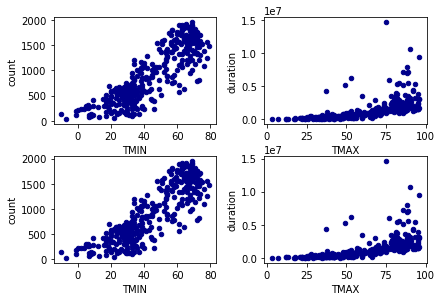

In [278]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2)
plt.tight_layout()
rides_temps.plot.scatter(x='TMIN',y='count',c='DarkBlue',ax=axes[0,0])
rides_temps.plot.scatter(x='TMAX',y='duration',c='DarkBlue',ax=axes[0,1])
rides_temps.plot.scatter(x='TMIN',y='count',c='DarkBlue',ax=axes[1,0])
rides_temps.plot.scatter(x='TMAX',y='duration',c='DarkBlue',ax=axes[1,1])

This time, apply a polynomial transformation to `TMIN` and `TMAX` to see if a model that incorporates these transformed features results in better fit. This will mean going back and redoing some of the preceding steps:

- Go back to the joined dataset, `rides_temps`. Create two new features: TMIN squared, and TMAX squared
- Again, split it into training and testing sets. Use a `test_size` of .2, and a `random_state` of 42
- Again, normalize the temperatures and the transformed temperatures using the means and standard deviations from the trainng set
- Create a linear regression using the low and the high, and the square of the low and the square of the high to predict ride duration
- Return the Mean Absolute Error (MAE), Mean Squared Error (MSE) and $R^2$ as a tuple, in that order

In [279]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

def question_8():
    # Crear las nuevas características TMIN^2 y TMAX^2
    rides_temps['TMIN_squared'] = rides_temps['TMIN'] ** 2
    rides_temps['TMAX_squared'] = rides_temps['TMAX'] ** 2

    # Dividir los datos en conjuntos de entrenamiento y prueba
    rt_train, rt_test = train_test_split(rides_temps, test_size=0.2, random_state=42)

    # Seleccionamos las columnas a normalizar
    columns_to_normalize = ['TMIN', 'TMAX', 'TMIN_squared', 'TMAX_squared']

    # Calcular la media y desviación estándar de las columnas de entrenamiento
    train_mean = rt_train[columns_to_normalize].mean()
    train_std_deviation = rt_train[columns_to_normalize].std()

    # Normalizar el conjunto de entrenamiento
    rt_train_normalized = rt_train.copy()
    for column in columns_to_normalize:
        rt_train_normalized[column] = (rt_train[column] - train_mean[column]) / train_std_deviation[column]

    # Normalizar el conjunto de prueba usando la media y desviación estándar del conjunto de entrenamiento
    rt_test_normalized = rt_test.copy()
    for column in columns_to_normalize:
        rt_test_normalized[column] = (rt_test[column] - train_mean[column]) / train_std_deviation[column]

    # Crear el modelo de regresión lineal
    X_train = rt_train_normalized[['TMIN', 'TMAX', 'TMIN_squared', 'TMAX_squared']]
    y_train = rt_train_normalized['duration']

    X_test = rt_test_normalized[['TMIN', 'TMAX', 'TMIN_squared', 'TMAX_squared']]
    y_test = rt_test_normalized['duration']

    # Ajustar el modelo
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = model.predict(X_test)

    # Calcular las métricas de evaluación
    mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
    mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # R-squared

    # Devolver las métricas como una tupla
    return (mae, mse, r2)

In [280]:
# As a simple sanity check, verify that your answer contains three values
mae, mse, r2 = question_8()

# For grading, the autograder will verify that your MAE, MSE, and R2 are correct